<a href="https://colab.research.google.com/github/Nidzoki/PMFST_IntroToDS_Examples_of_Good_Practice/blob/main/4/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [49]:
housing_df = pd.read_csv("/content/drive/MyDrive/california_housing_modified.csv")
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20650,2.5417,NaN,5.086022,1.172043,242.0,2.602151,38.01,-120.37,1.232
20651,3.0000,NaN,3.614148,0.988746,1762.0,2.832797,34.08,-118.12,2.539
20652,2.8594,NaN,4.151458,1.118532,4818.0,4.532455,33.76,-117.91,2.151
20653,3.3409,NaN,4.646983,1.093710,3171.0,4.070603,34.20,-119.19,2.205


In [50]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20655 entries, 0 to 20654
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20655 non-null  float64
 1   HouseAge     19608 non-null  float64
 2   AveRooms     20036 non-null  float64
 3   AveBedrms    20655 non-null  float64
 4   Population   20655 non-null  float64
 5   AveOccup     20655 non-null  float64
 6   Latitude     20655 non-null  float64
 7   Longitude    20655 non-null  float64
 8   MedHouseVal  20655 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [51]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20655.000000,19608.000000,20036.000000,20655.000000,20655.000000,20655.000000,20655.000000,20655.000000,20655.000000
mean,3.870797,28.621940,5.428696,1.096654,1425.646817,3.080712,35.631515,-119.569492,2.070596
std,1.899608,12.602572,2.492907,0.473743,1132.446662,10.395885,2.135608,2.003282,1.159056
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563800,18.000000,4.438596,1.006111,787.000000,2.430197,33.930000,-121.800000,1.198000
50%,3.534900,29.000000,5.229341,1.048780,1166.000000,2.818493,34.260000,-118.490000,1.798000
75%,4.743700,37.000000,6.051005,1.099526,1725.000000,3.282459,37.710000,-118.010000,2.650000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,14.667000


In [52]:
housing_df_filled = housing_df
housing_df_filled['HouseAge'] = housing_df_filled['HouseAge'].fillna(housing_df['HouseAge'].median())
housing_df_filled['AveRooms'] = housing_df_filled['AveRooms'].fillna(housing_df['AveRooms'].median())

housing_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20655 entries, 0 to 20654
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20655 non-null  float64
 1   HouseAge     20655 non-null  float64
 2   AveRooms     20655 non-null  float64
 3   AveBedrms    20655 non-null  float64
 4   Population   20655 non-null  float64
 5   AveOccup     20655 non-null  float64
 6   Latitude     20655 non-null  float64
 7   Longitude    20655 non-null  float64
 8   MedHouseVal  20655 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

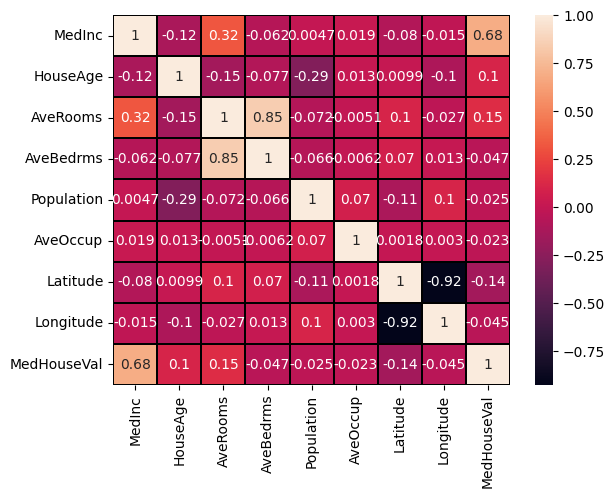

In [53]:
housing_df_filled_corr = housing_df_filled.corr()
sns.heatmap(housing_df_filled_corr, annot=True, linecolor='black', linewidths=0.1)

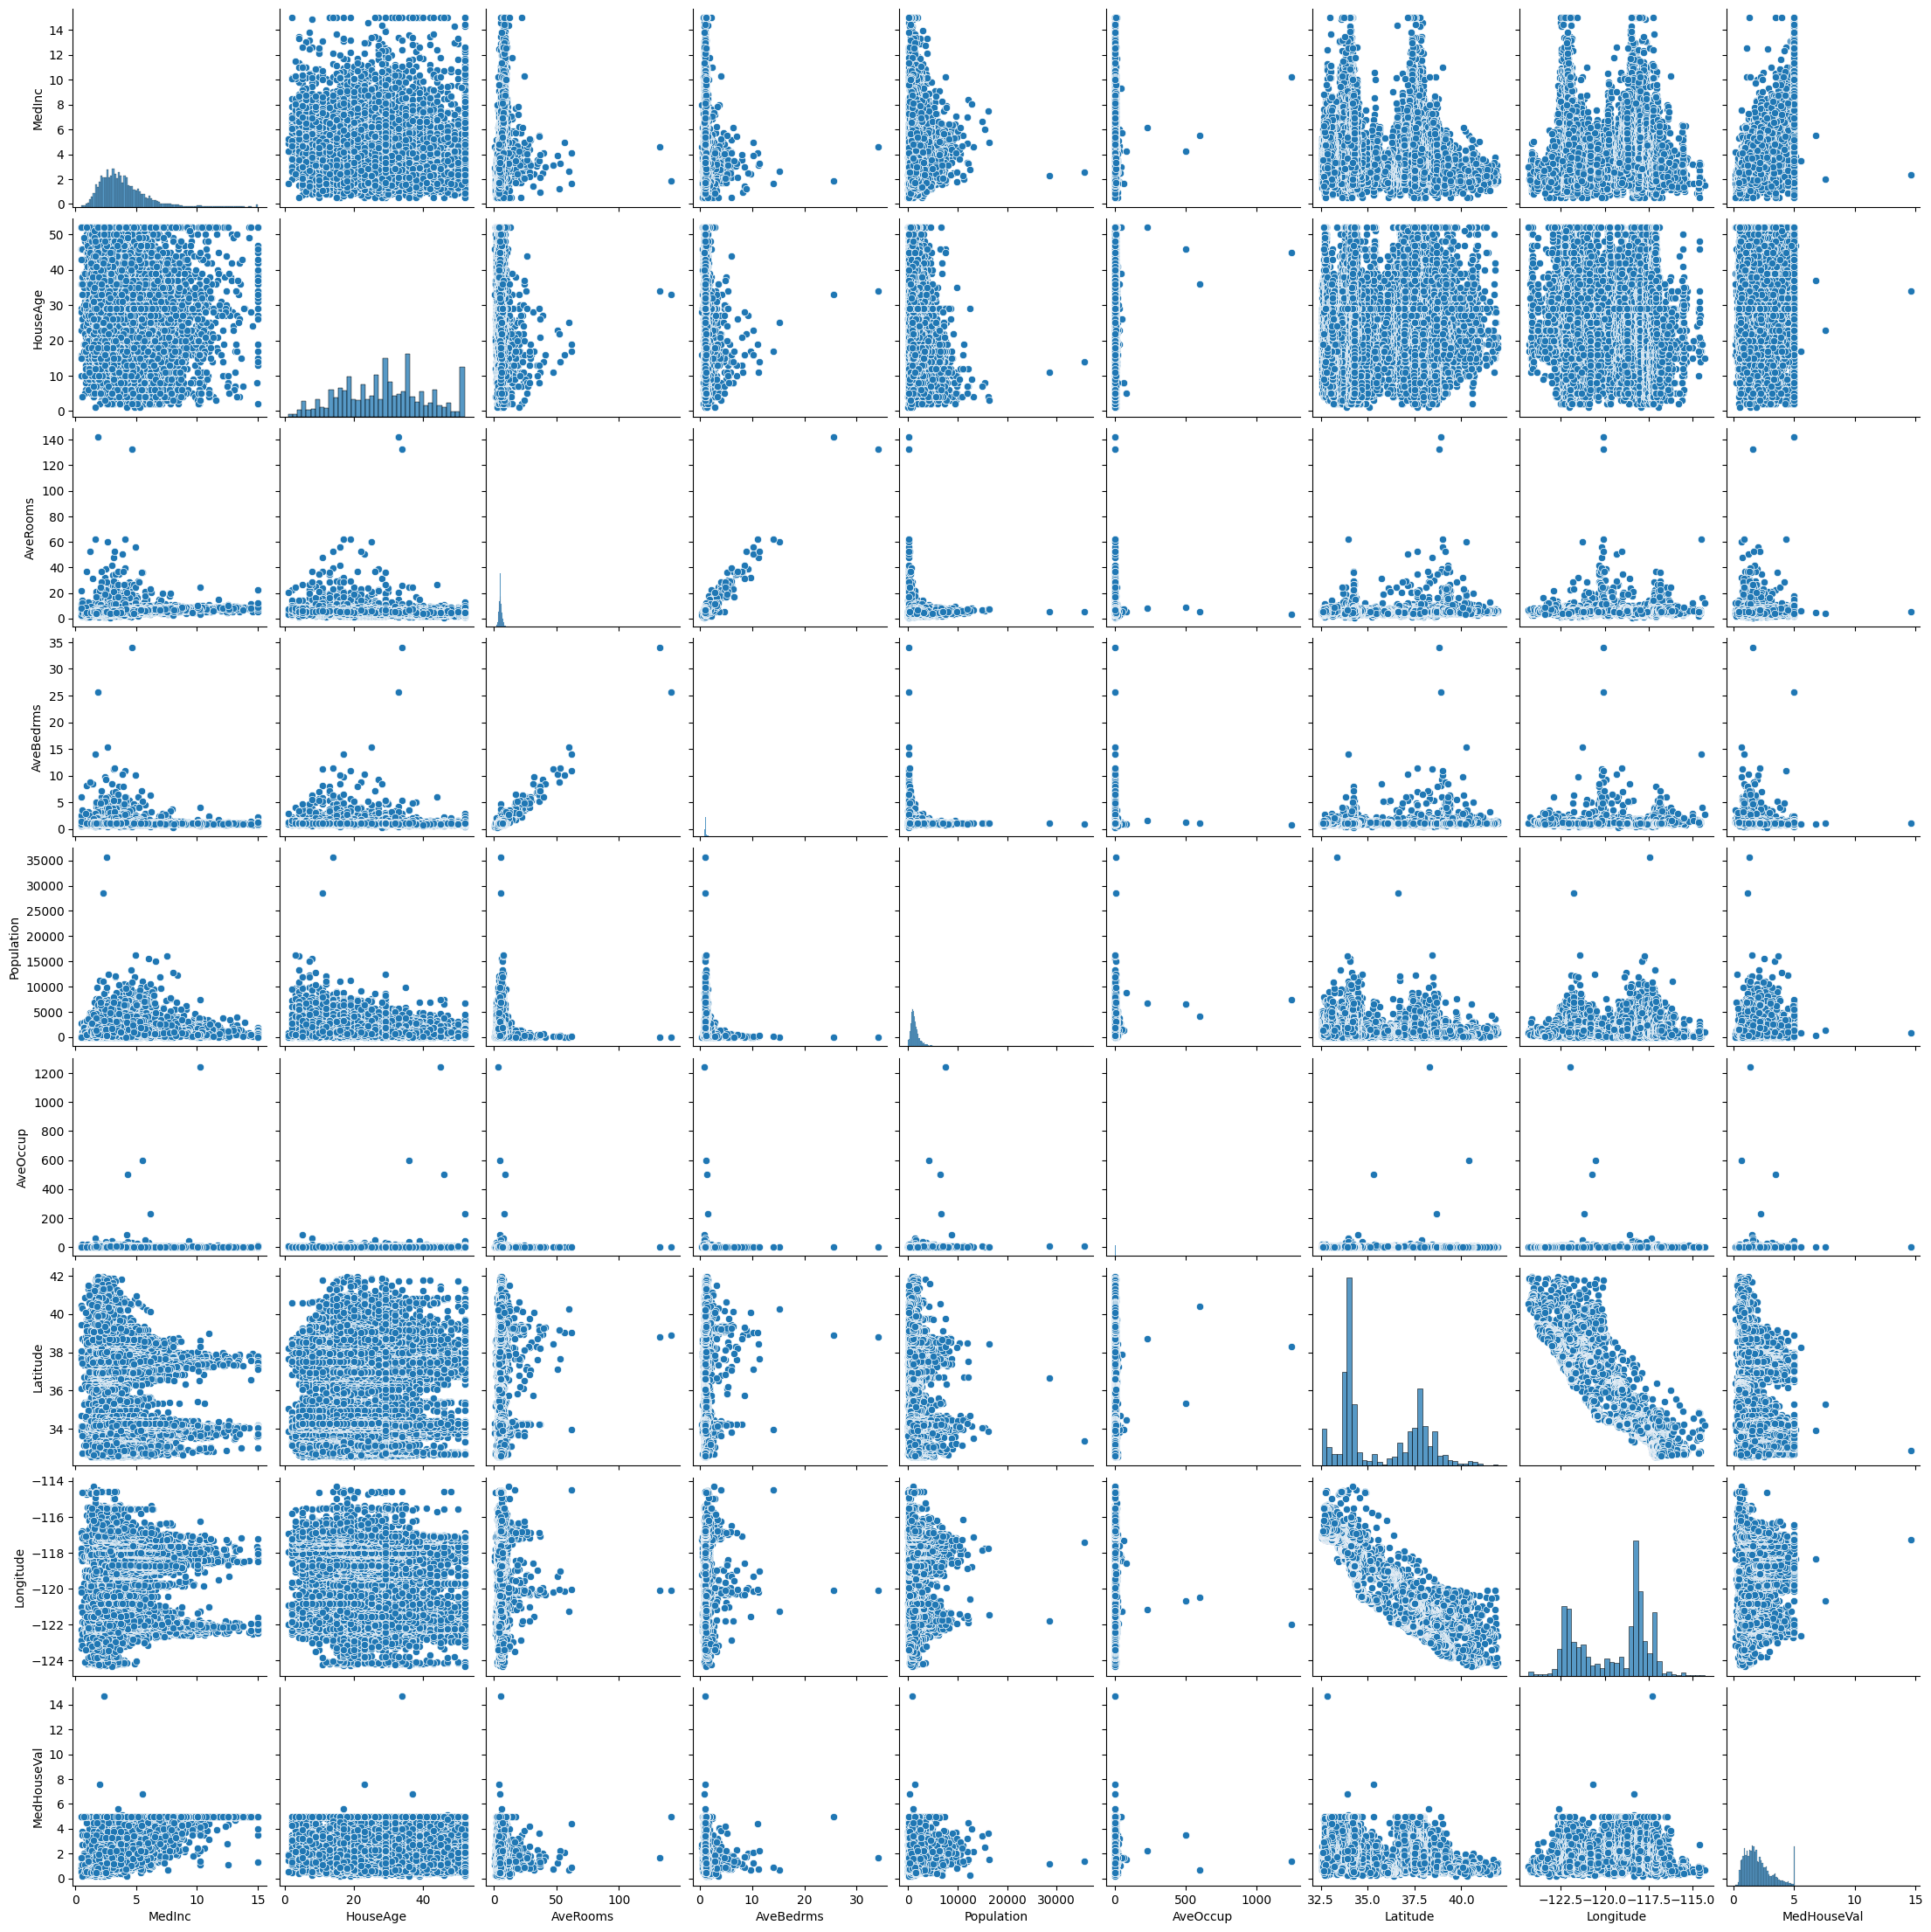

In [59]:
sns.pairplot(housing_df_filled)

In [55]:
X = housing_df_filled.drop(['MedHouseVal'], axis=1)
y = housing_df_filled['MedHouseVal']

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 2.34496252,  1.00650886,  0.63589567, ..., -0.05051701,
         1.05288006, -1.32810667],
       [ 2.33243332, -0.62229172,  0.33208486, ..., -0.0933921 ,
         1.04351482, -1.32311474],
       [ 1.78283305,  1.90234918,  1.1669644 , ..., -0.02678548,
         1.0388322 , -1.3330986 ],
       ...,
       [-0.53243704,  0.02922851, -0.51773311, ...,  0.13964936,
        -0.87635966,  0.82840632],
       [-0.2789576 ,  0.02922851, -0.31592622, ...,  0.09522186,
        -0.67032435,  0.18943951],
       [ 0.78755119,  0.02922851,  0.52136297, ...,  0.01611028,
        -0.80143773,  0.79346282]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y,
 test_size=0.2,
 random_state=42,
)

In [58]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 0.5289
R² Score: 0.7910
MAE: 0.3402
